# **[통계적기계학습]**  
- 학과 : 컴퓨터전자시스템공학부  
- 학번 : 202002203  
- 이름 : 유승리


### 1. Newton-Raphson method를 함수화한 코드를 작성하여 최적화를 수행하여라.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_derivative(f, x, h = 1e-3):
  return (f(x + h) - f(x - h)) / (2 * h)


def newton_raphson(f, x0, tol = 1e-8, max_iter = 1000):
  h, tol_h = 1e-3, 5e-10 
  iter = 0 # 반복 수
  Xn = [None] * max_iter # 업데이트 되는 값 저장

  while True:
      f_drv = numerical_derivative(f, x0, h)
      x1 = x0 - f(x0) / f_drv
      diff = abs(x1 - x0)

      if (diff < tol or h < tol_h):
          ans = x1
          break
      else :
          iter += 1
          x0 = x1
          Xn[iter] = x0

  # 반복 횟수 / f를 최소로 만드는 x / f(x)
  print()
  print("iter\t optimal x\t\t f(x)")
  print(f"{iter}\t {x1}\t {f(x1)}")
  print()

  # x 업데이트 과정 시각화
  plt.figure(figsize=(12, 5))
  plt.plot(Xn[1:iter+1], ls = "-", marker = ".", c = "r")
  plt.grid(True)
  plt.title('Newton-Raphson Graphics for f')
  plt.xlabel('Iteration')
  plt.ylabel('Solution')  
  plt.legend(['x'], loc='upper left')
  plt.show()

<br>  
<br>

---


### 2. Gradient method를 함수화한 코드를 작성하여 최적화를 수행하여라.

In [2]:
def gradient_method(f, x0, lr = 0.05, tol = 1e-8, max_iter = 1000):
  iter = 0 # 반복 수
  Xn = [None] * max_iter # 업데이트 되는 값 저장

  while True:
    f_drv = numerical_derivative(f, x0)
    x1 = x0 - lr*f_drv
    diff = abs(x1 - x0)

    if diff < tol:
      ans = x1
      break
    else :
      iter += 1
      x0 = x1
      Xn[iter] = x0


  # 반복 횟수 / f를 최소로 만드는 x / f(x)
  print()
  print("iter\t optimal x\t\t\t f(x)")
  print(f"{iter}\t {x1}\t {f(x1)}")
  print()

  # x 업데이트 과정 시각화
  plt.figure(figsize=(12, 5))
  plt.plot(Xn[1:iter+1], ls = "-", marker = ".", c = "r")
  plt.grid(True)
  plt.title('Gradient method Graphics for f')
  plt.xlabel('Iteration')
  plt.ylabel('Solution')  
  plt.legend(['x'], loc='upper left')
  plt.show()

***
***
### Newton-Raphson method와 Gradient method 결과 확인
⇒ 구현한 newton_rapshon과 gradient_method에서 반환되는 값과 파이썬 scipy 라이브러리에서 제공하는 최적화 함수인 minimize의 결과를 비교했을 때,   
값이 모두 유사한 것을 확인할 수 있다.

1. f(x) = x^4 + 3x^2 / x = 1

In [3]:
f = lambda x : x**4 + 3*x**2
x = 1


iter	 optimal x		 f(x)
27	 5.132726036881716e-09	 7.903462970905046e-17



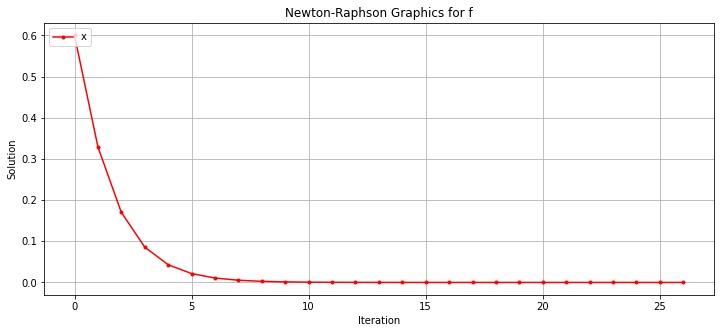

In [4]:
newton_raphson(f, x)


iter	 optimal x			 f(x)
47	 2.298202759255265e-08	 1.5845207767945544e-15



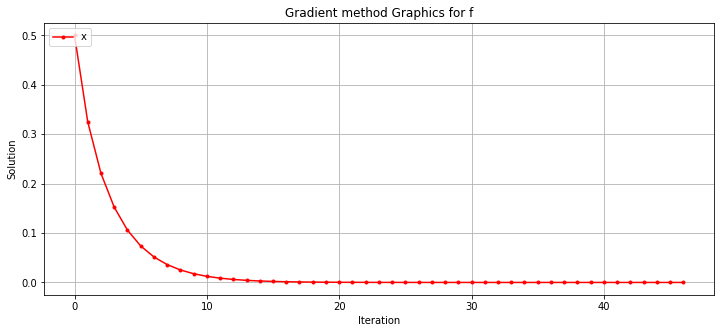

In [5]:
gradient_method(f, x)

In [6]:
from scipy.optimize import minimize

res = minimize(f, x)
print(res.x)

[-3.77838067e-07]


<br>  

2. f(x) = x^2 -1 / x = 2

In [7]:
f = lambda x : x**2 - 1
x = 2


iter	 optimal x		 f(x)
5	 1.0	 0.0



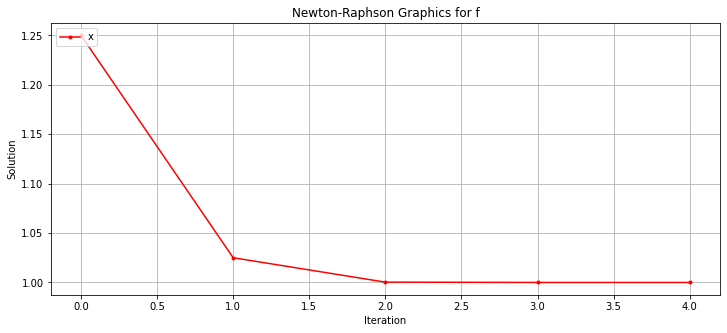

In [8]:
newton_raphson(f, x)


iter	 optimal x			 f(x)
160	 8.591599476304168e-08	 -0.9999999999999927



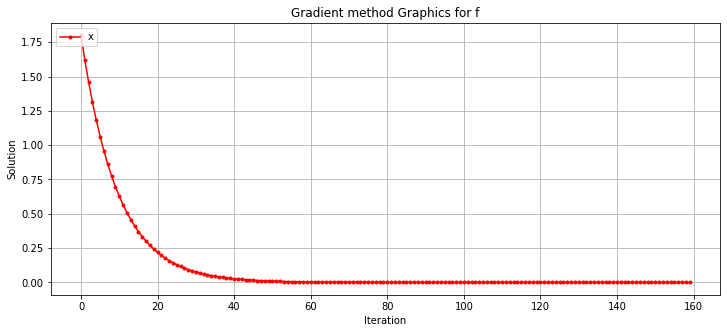

In [9]:
gradient_method(f, x)

In [10]:
res = minimize(f, x)
print(res.x)

[-1.88846401e-08]


<br>  

3. f(x) = sin(x) / x = 10

In [11]:
f = lambda x : np.sin(x)
x = 10


iter	 optimal x		 f(x)
3	 9.42477796076938	 3.6739403974420594e-16



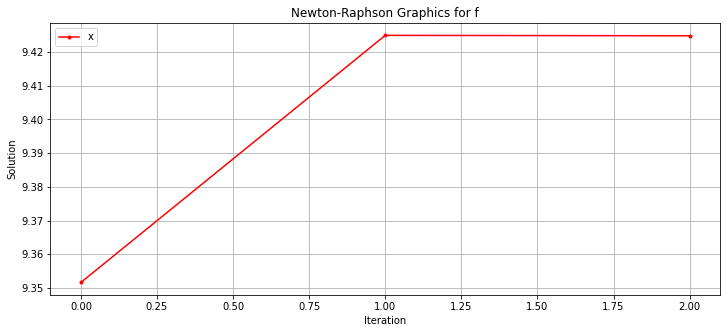

In [12]:
newton_raphson(f, x)


iter	 optimal x			 f(x)
303	 10.99557410258511	 -0.9999999999999829



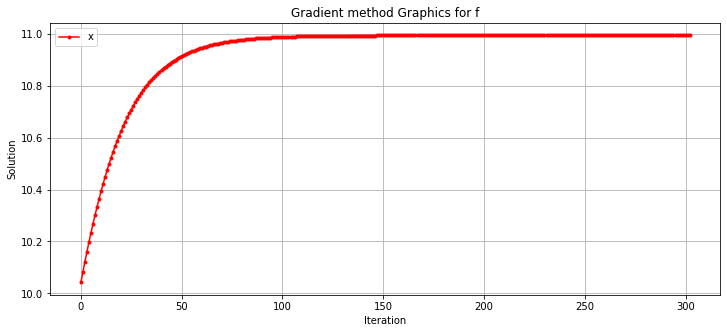

In [13]:
gradient_method(f, x)

In [14]:
res = minimize(f, x)
print(res.x)

[10.9955743]


<br>  

4. f(x) = 2x^3 + cos(x) / x = 1

In [15]:
f = lambda x : 2*x**3 + np.cos(x)
x = 1


iter	 optimal x		 f(x)
6	 -0.721406032674848	 -1.1102230246251565e-16



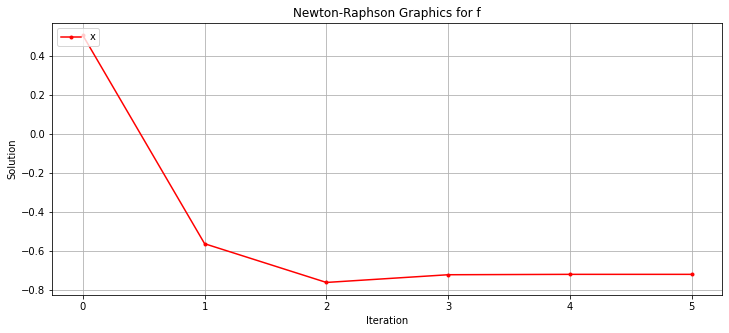

In [16]:
newton_raphson(f, x)


iter	 optimal x			 f(x)
259	 0.1659013362376468	 0.9954021971236524



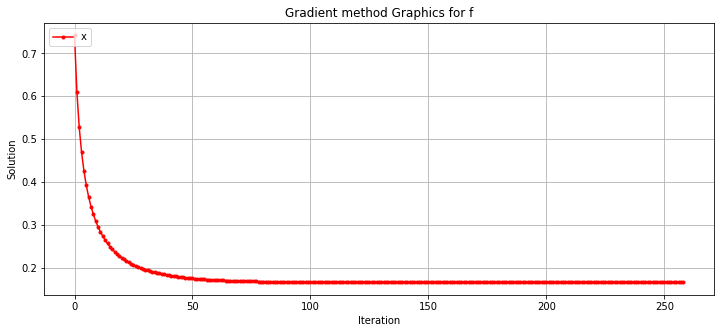

In [17]:
gradient_method(f, x)

In [18]:
res = minimize(f, x)
print(res.x)

[-2.13954746]


<br>  

5. f(x) = x^4 - 4x^3 + 4x^2 + x - 4 / x = -0.5

In [19]:
f = lambda x : x**4 - 4*x**3 +4*x**2 + x - 4
x = - 0.5


iter	 optimal x		 f(x)
5	 -0.7853708436714597	 -1.3322676295501878e-15



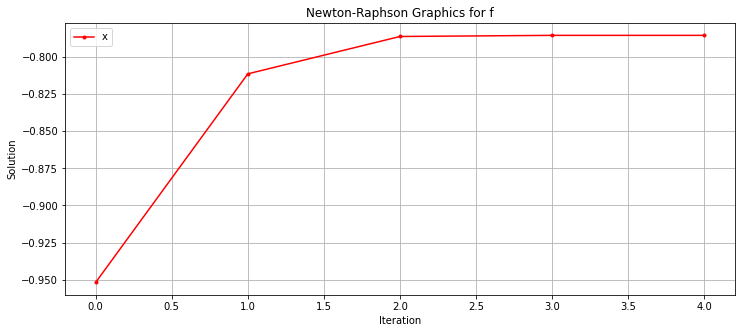

In [20]:
newton_raphson(f, x)


iter	 optimal x			 f(x)
21	 -0.10715946393026154	 -4.056172885243574



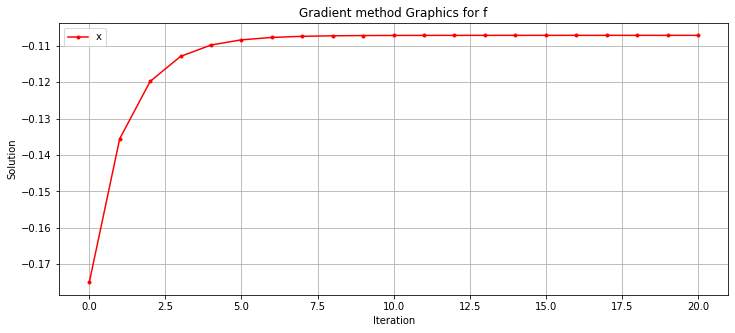

In [21]:
gradient_method(f, x)

In [22]:
res = minimize(f, x)
print(res.x)

[-0.10715971]
